In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import math
from utils import MyDataset, read_data, visualize, set_seed, save_and_plot_simu
from torch.utils.data import DataLoader
import numpy as np
from training import train, test
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEQ_LEN = 200
dim_inputs = 50
hidden_size = 100
latent_size = 100

batch_size = 64
base_lr = 0.01
lr_step = 10
num_epochs = 150

# Set random seed
set_seed(1021)

In [90]:
file = "../Simulation/data/simu6.csv"
data = read_data(file, None, SEQ_LEN, dim_inputs)
save_name_gen = '../Simulation/Result_for_Plot/simu6_gen'
save_name_status = '../Simulation/Result_for_Plot/simu6_status'

In [98]:
# Set random seed
set_seed(1021)
train_data = data
print(data.shape)
train_locs = np.array([[1, 1] for _ in range(data.shape[0])])
net = train(train_data, train_locs, batch_size, base_lr, lr_step, num_epochs, hidden_size, latent_size, SEQ_LEN)

(199, 200, 50)
Epoch [1/150], Loss1: 1217.5029, Loss2: 0.5132, Loss3: 0.0145
Epoch [2/150], Loss1: 707.8467, Loss2: 0.7507, Loss3: 0.0041
Epoch [3/150], Loss1: 390.7570, Loss2: 0.9987, Loss3: 0.0085
Epoch [4/150], Loss1: 460.0328, Loss2: 0.9950, Loss3: 0.0232
Epoch [5/150], Loss1: 2693.1545, Loss2: 0.9941, Loss3: 0.0311
Epoch [6/150], Loss1: 1590.0385, Loss2: 0.9909, Loss3: 0.0260
Epoch [7/150], Loss1: 372.4301, Loss2: 0.9935, Loss3: 0.0517
Epoch [8/150], Loss1: 1063.7087, Loss2: 0.9822, Loss3: 0.0654
Epoch [9/150], Loss1: 350.0505, Loss2: 0.9922, Loss3: 0.0710
Epoch [10/150], Loss1: 487.5428, Loss2: 0.9937, Loss3: 0.0869
Epoch [11/150], Loss1: 305.8721, Loss2: 0.9870, Loss3: 0.0753
Epoch [12/150], Loss1: 182.6548, Loss2: 0.9856, Loss3: 0.1331
Epoch [13/150], Loss1: 184.8132, Loss2: 0.9883, Loss3: 0.0822
Epoch [14/150], Loss1: 281.7699, Loss2: 0.9912, Loss3: 0.0801
Epoch [15/150], Loss1: 181.6403, Loss2: 0.9941, Loss3: 0.1017
Epoch [16/150], Loss1: 263.8539, Loss2: 0.9987, Loss3: 0.090

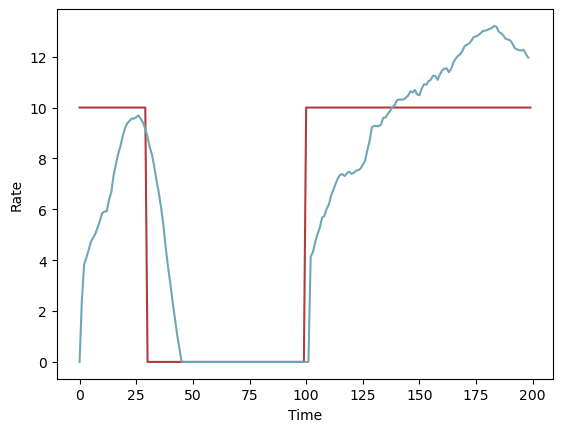

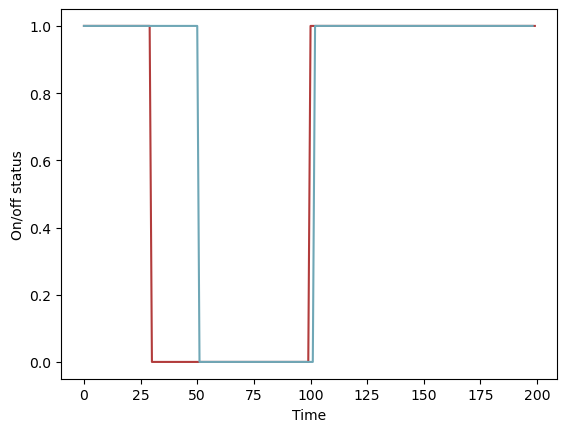

In [99]:
set_seed(1021)
test_data = data
prediction, generation, trans_status = test(test_data, train_locs, net)
rates = [10]*30 + [0]*70 + [10]*100  
onoff = [1]*30 + [0]*70 + [1]*100

generation = generation.squeeze().cpu().detach().numpy()        # sample*time_steps
trans_status = trans_status.squeeze().cpu().detach().numpy()
save_and_plot_simu(rates, generation*trans_status, filename=save_name_gen)
save_and_plot_simu(onoff, trans_status, filename=save_name_status, switch='onoff')